In [1]:
#!pip install pycaret

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pycaret   
from pycaret.classification import *

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Data Analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Bluetooth

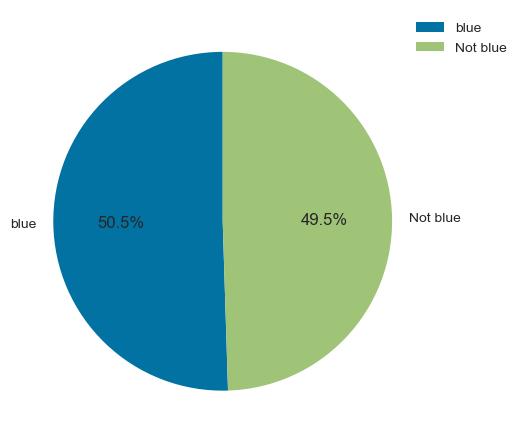

In [8]:
labels = ["blue",'Not blue']
values=train['blue'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.show()

## Wifi

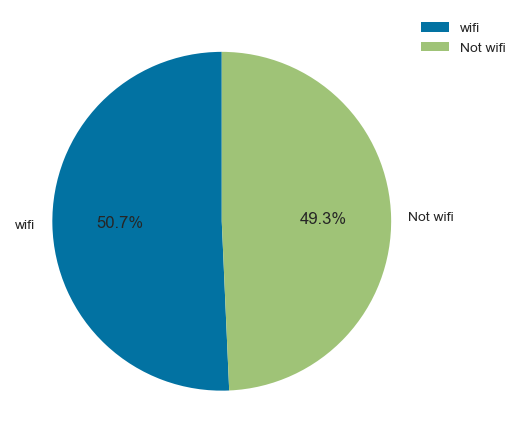

In [9]:
labels = ["wifi",'Not wifi']
values=train['wifi'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.show()

## Internal Memory vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

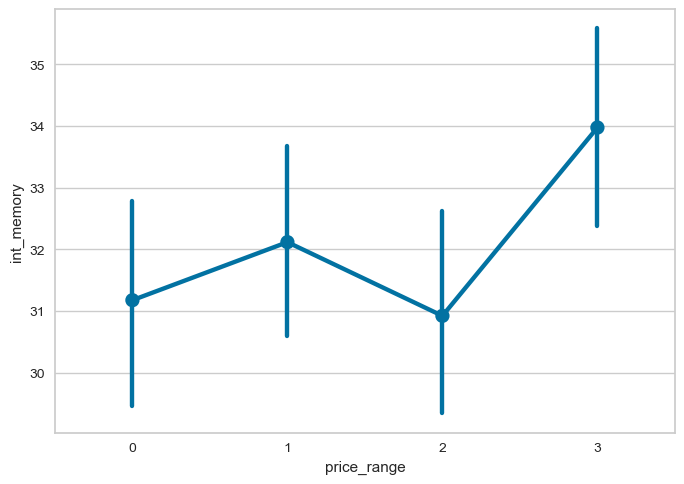

In [10]:
sns.pointplot(y="int_memory", x="price_range", data=train)

## 3G supported

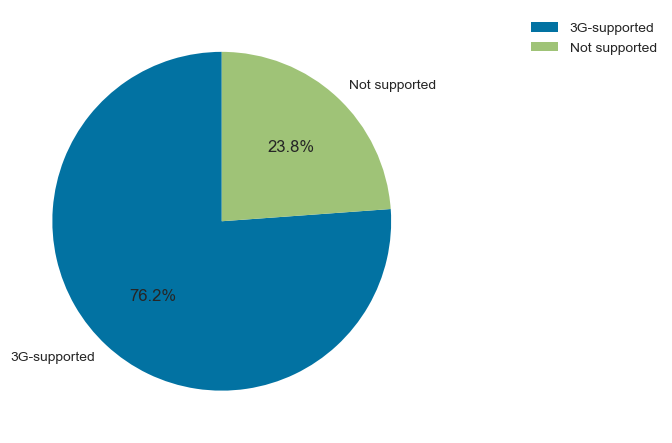

In [11]:
labels = ["3G-supported",'Not supported']
values=train['three_g'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.show()

## 4G supported

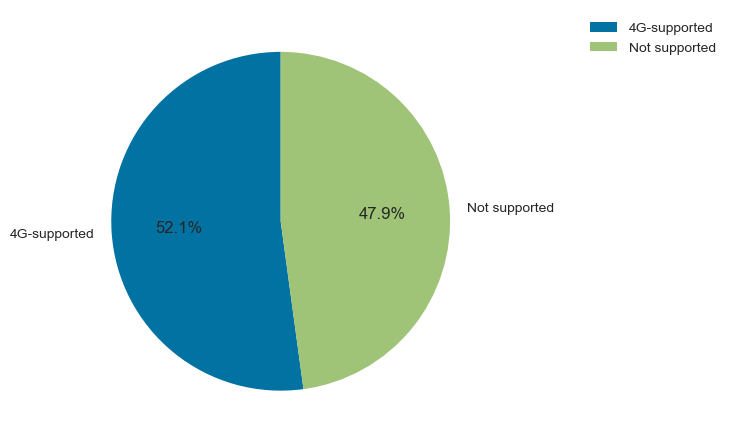

In [12]:
labels = ["4G-supported",'Not supported']
values=train['four_g'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.show()

## Ram vs Price Range

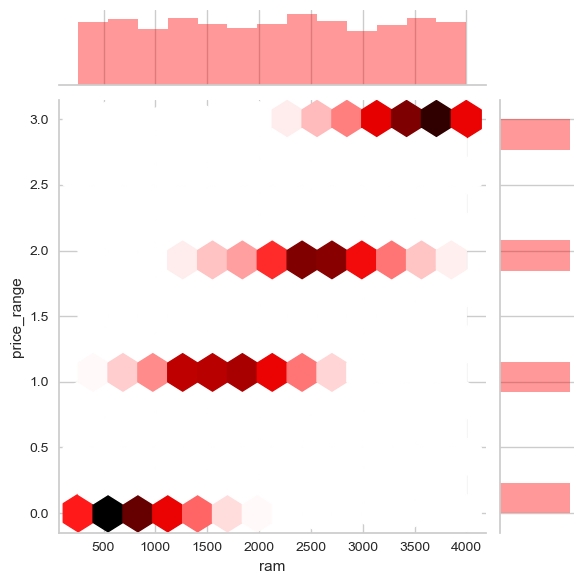

In [13]:
sns.jointplot(x='ram',y='price_range',data=train,color='red', kind ="hex");

## Price Range vs Battery power 

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

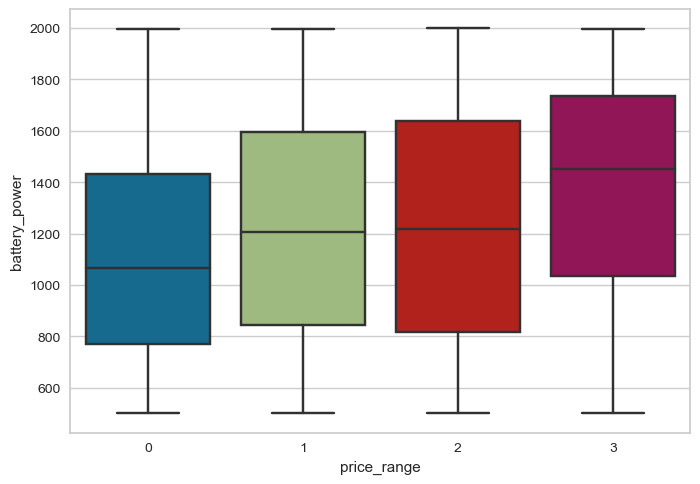

In [14]:
sns.boxplot(x="price_range", y="battery_power", data=train)

## Front camera x Primary camera

In [15]:
#plt.figure(figsize=(10,6))
#train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
#train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
#plt.legend()

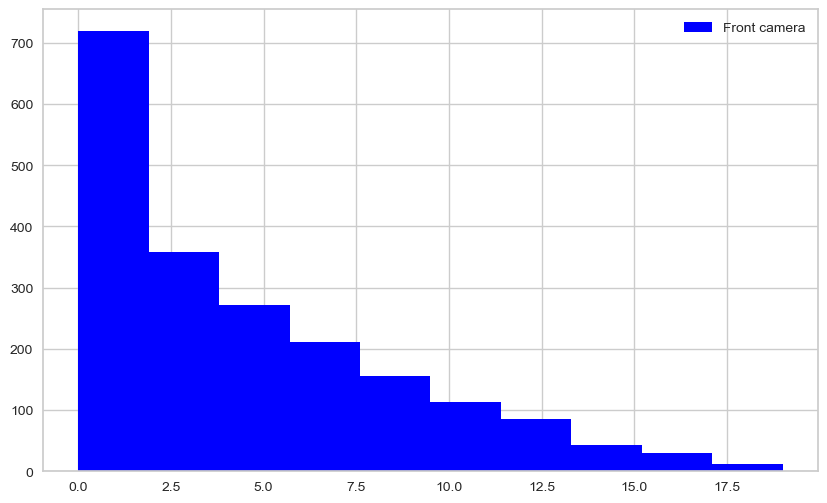

In [16]:
plt.figure(figsize=(10,6))
train['fc'].hist(color='blue',label='Front camera')
plt.legend()

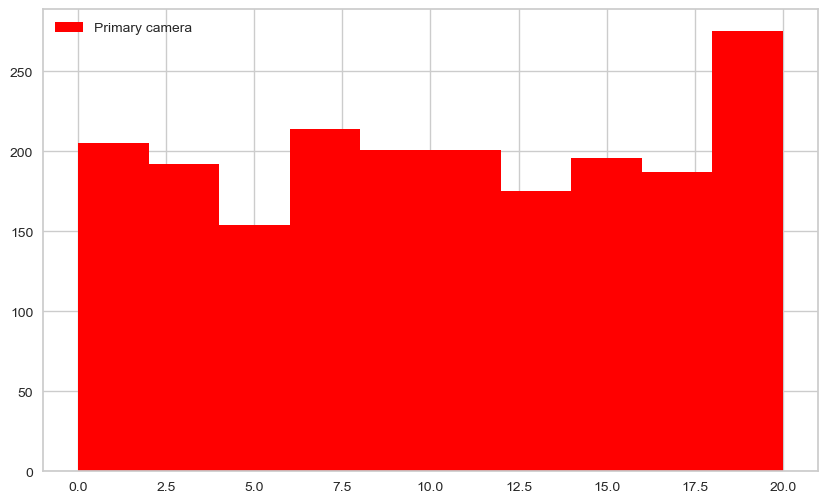

In [17]:
plt.figure(figsize=(10,6))
train['pc'].hist(color='red',label='Primary camera')
plt.legend()

# Start AutoML

In [18]:
test = test.drop(columns=['id'], axis=1)

## Set up our dataset (preprocessing)

In [19]:
exp = setup(data = train, target = 'price_range')

,Description,Value
0,Session id,6265
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(2000, 21)"
4,Transformed data shape,"(2000, 21)"
5,Transformed train set shape,"(1400, 21)"
6,Transformed test set shape,"(600, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


## Compare the models

In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9350,0.9950,0.9350,0.9375,0.9354,0.9133,0.9139,0.0430
qda,Quadratic Discriminant Analysis,0.9221,0.9931,0.9221,0.9237,0.9220,0.8962,0.8968,0.0380
knn,K Neighbors Classifier,0.9157,0.9877,0.9157,0.9180,0.9153,0.8876,0.8886,0.1000
lightgbm,Light Gradient Boosting Machine,0.8993,0.9871,0.8993,0.9026,0.8993,0.8657,0.8669,0.5440
gbc,Gradient Boosting Classifier,0.8950,0.9843,0.8950,0.8972,0.8948,0.8600,0.8608,1.1010
rf,Random Forest Classifier,0.8729,0.9765,0.8729,0.8734,0.8722,0.8305,0.8311,0.3060
et,Extra Trees Classifier,0.8414,0.9681,0.8414,0.8409,0.8401,0.7886,0.7892,0.2730
dt,Decision Tree Classifier,0.8286,0.8857,0.8286,0.8336,0.8278,0.7714,0.7735,0.0460
nb,Naive Bayes,0.8021,0.9498,0.8021,0.8051,0.8021,0.7362,0.7371,0.0610
ada,Ada Boost Classifier,0.7221,0.9219,0.7221,0.7587,0.7201,0.6295,0.6403,0.1330


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

## let's create a Linear Discriminant Analysis

In [21]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9571,0.9969,0.9571,0.9598,0.9575,0.9429,0.9435
1,0.9429,0.9944,0.9429,0.9478,0.9432,0.9238,0.9254
2,0.9643,0.9973,0.9643,0.9647,0.9644,0.9524,0.9524
3,0.9500,0.9931,0.9500,0.9505,0.9500,0.9333,0.9335
4,0.8929,0.9924,0.8929,0.8998,0.8946,0.8571,0.8583
5,0.9143,0.9937,0.9143,0.9142,0.9141,0.8857,0.8858
6,0.9143,0.9939,0.9143,0.9162,0.9149,0.8857,0.8860
7,0.9571,0.9976,0.9571,0.9587,0.9575,0.9429,0.9431
8,0.9429,0.9961,0.9429,0.9448,0.9429,0.9238,0.9244


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Let's tune it!

In [22]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9571,0.9984,0.9571,0.9601,0.9575,0.9429,0.9436
1,0.9500,0.9974,0.9500,0.9554,0.9503,0.9333,0.9351
2,0.9571,0.9972,0.9571,0.9573,0.9571,0.9429,0.9429
3,0.9571,0.9959,0.9571,0.9582,0.9571,0.9429,0.9432
4,0.9000,0.9919,0.9000,0.9034,0.9010,0.8667,0.8671
5,0.9357,0.9938,0.9357,0.9363,0.9354,0.9143,0.9147
6,0.9571,0.9958,0.9571,0.9590,0.9575,0.9429,0.9432
7,0.9714,0.9980,0.9714,0.9718,0.9715,0.9619,0.9620
8,0.9500,0.9970,0.9500,0.9513,0.9502,0.9333,0.9337


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Learning Curve

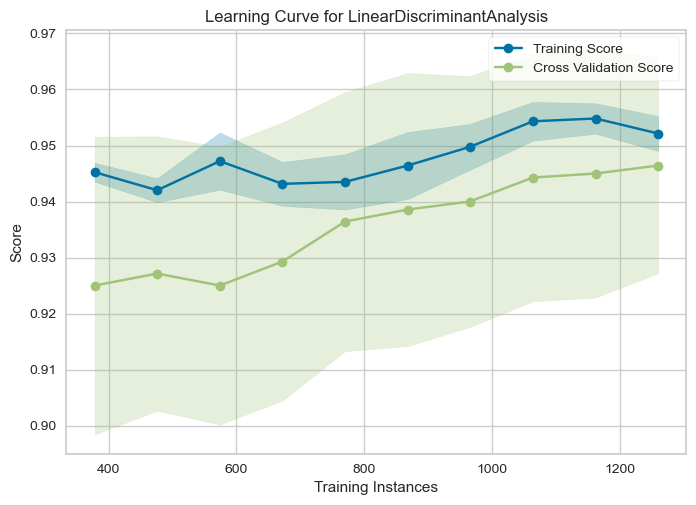

In [23]:
plot_model(estimator = tuned_lda, plot = 'learning')

## AUC Curve

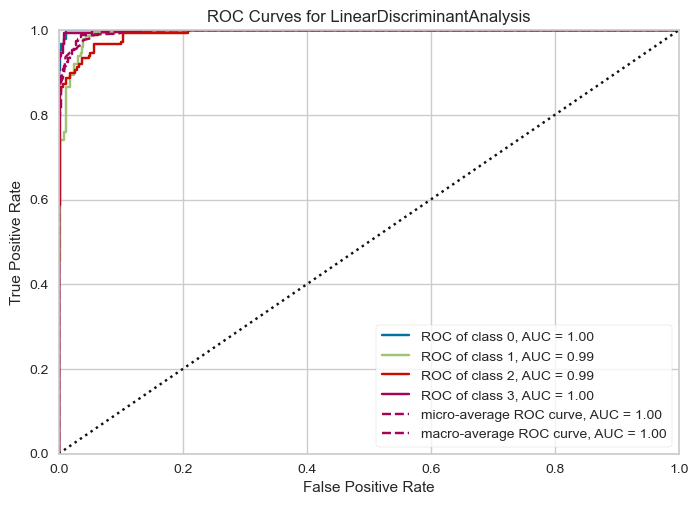

In [24]:
plot_model(estimator = tuned_lda, plot = 'auc')

## Confusion Matrix

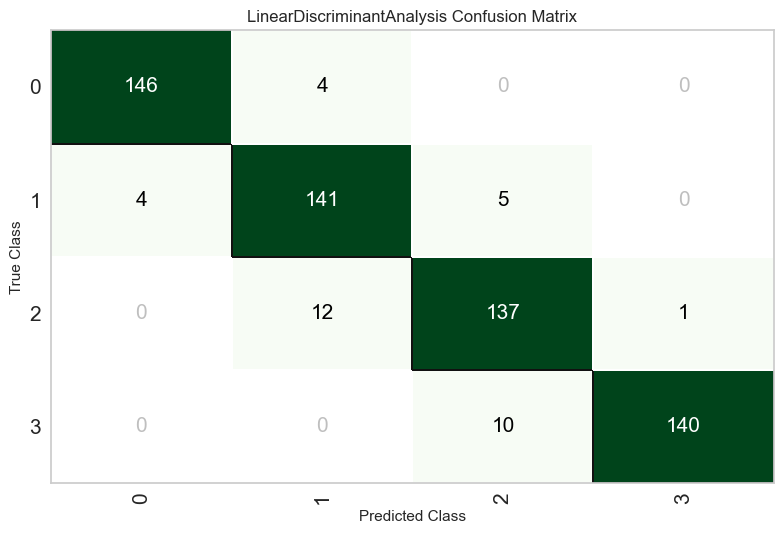

In [25]:
plot_model(estimator = tuned_lda, plot = 'confusion_matrix')

## Feature Importance

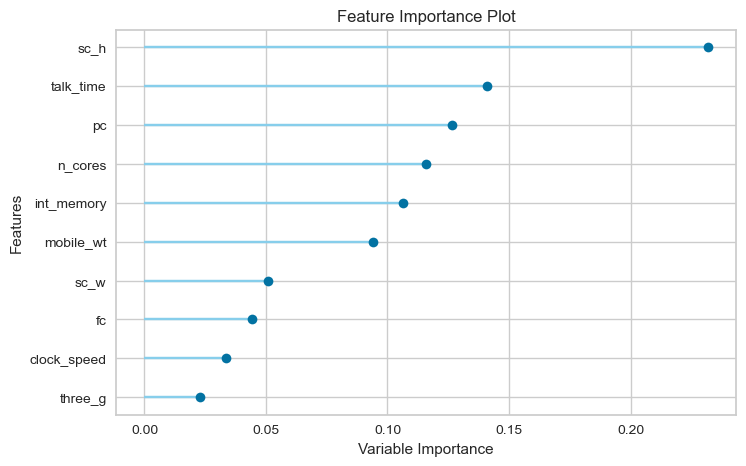

In [26]:
plot_model(estimator = tuned_lda, plot = 'feature')

## whole thing!

In [27]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predictions

In [28]:
prediction = predict_model(tuned_lda, data=test)
prediction.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction_label,prediction_score
0,1043.0,1.0,1.8,1.0,14.0,0.0,5.0,0.1,193.0,3.0,...,1412.0,3476.0,12.0,7.0,2.0,0.0,1.0,0.0,3,0.6713
1,841.0,1.0,0.5,1.0,4.0,1.0,61.0,0.8,191.0,5.0,...,857.0,3895.0,6.0,0.0,7.0,1.0,0.0,0.0,3,0.9879
2,1807.0,1.0,2.8,0.0,1.0,0.0,27.0,0.9,186.0,3.0,...,1366.0,2396.0,17.0,10.0,10.0,0.0,1.0,1.0,2,0.8880
3,1546.0,0.0,0.5,1.0,18.0,1.0,25.0,0.5,96.0,8.0,...,1752.0,3893.0,10.0,0.0,7.0,1.0,1.0,0.0,3,1.0000
4,1434.0,0.0,1.4,0.0,11.0,1.0,49.0,0.5,108.0,6.0,...,810.0,1773.0,15.0,8.0,7.0,1.0,0.0,1.0,1,0.9229
